## Importación modulos y dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
data = pd.read_csv("../data/conchillas_listo.csv", sep=",", low_memory=False)

In [5]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,...,Adulto_AT,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,5,6.18,1.83,13.57,10.00,8.10,6.04,5.15,LU,...,True,0.296117,0.736920,0.745679,0.183000,0.455416,0.604000,0.596905,0.302980,0.762963
1,96,5,6.16,1.83,13.66,10.08,8.16,6.13,5.12,LU,...,True,0.297078,0.737921,0.751225,0.181548,0.450952,0.608135,0.597365,0.298532,0.754902
2,96,5,6.14,1.81,13.61,10.01,8.20,6.14,5.10,LU,...,True,0.294788,0.735489,0.748780,0.180819,0.451139,0.613387,0.602498,0.294788,0.748780
3,96,5,6.18,1.82,13.85,10.07,8.16,6.14,5.09,LU,...,True,0.294498,0.727076,0.752451,0.180735,0.446209,0.609732,0.589170,0.296417,0.757353
4,96,6,6.58,2.16,11.69,9.10,6.56,4.92,5.49,LU,...,True,0.328267,0.778443,0.750000,0.237363,0.562874,0.540659,0.561163,0.439024,1.003049


In [7]:
data.dtypes

Lote             int64
Individuo        int64
AE             float64
LE             float64
AT             float64
LT             float64
AA             float64
LA             float64
NV             float64
Morfotipo       object
Labio            int64
Adulto_NV         bool
Adulto_AT         bool
Ratio_LE_AE    float64
Ratio_LT_AT    float64
Ratio_LA_AA    float64
Ratio_LE_LT    float64
Ratio_AE_AT    float64
Ratio_LA_LT    float64
Ratio_AA_AT    float64
Ratio_LE_LA    float64
Ratio_AE_AA    float64
dtype: object

## Prueba Kmeans

### Con todas las variables iniciales

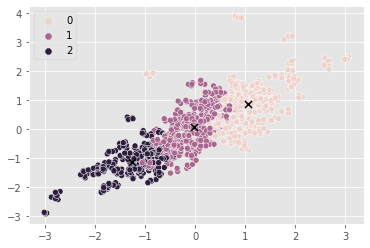

In [8]:
x = data[['AE','LE','AT','LT','AA','LA','NV']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans')

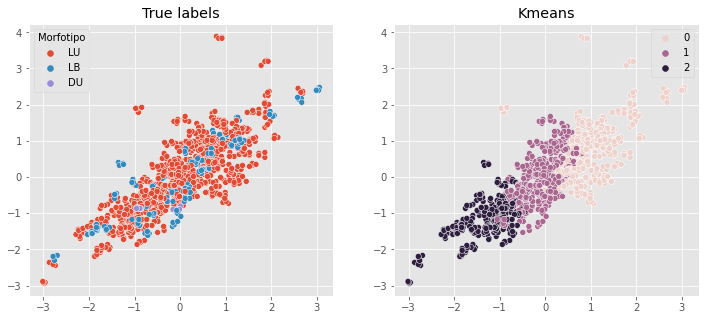

In [9]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

In [8]:
#no puede comparar etiquetas de letras con etiquetas numéricas
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f",yticklabels=['Benigno','Maligno']);

#print(classification_report(y_true,labels))

### Probamos KMEANS con todas las variables nuevas  + NV

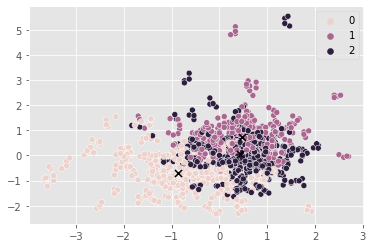

In [11]:
x_R = data[['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT',\
            'Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_R_scaled=scaler.fit_transform(x_R);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_R_scaled)

labels_R = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids_R = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_R_scaled[:,0],y=x_R_scaled[:,1],hue=labels_R,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids_R[:,0],centroids_R[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans_R')

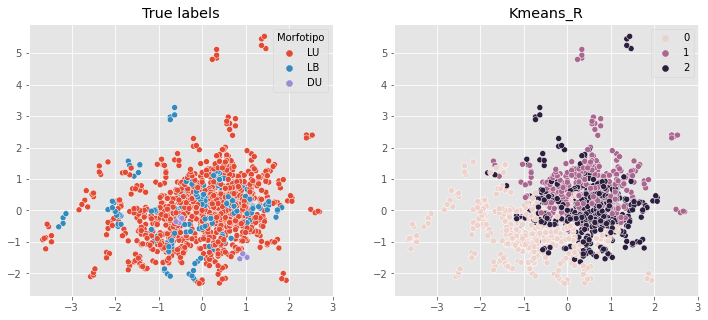

In [12]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_R,ax=ax[1])
ax[1].set_title('Kmeans_R')

# Prueba PCA

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
std_sclr = StandardScaler()

X = data[['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT',\
            'Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]

data_std = pd.DataFrame(std_sclr.fit_transform(X))

In [24]:
model = PCA()

In [25]:
model_pca = model.fit(data_std)

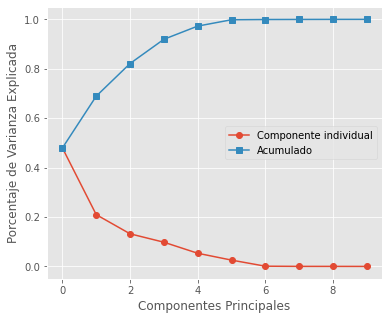

In [27]:
plt.figure(figsize=(6,5))

plt.plot(model_pca.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

In [29]:
pca_df = pd.DataFrame(model_pca.components_, index =['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT',\
            'Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'], columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
NV,-0.263590,-0.328634,-0.183394,0.180422,-0.414625,-0.363490,0.400173,0.080465,-0.441306,-0.301550
Ratio_LE_AE,-0.200614,-0.074554,0.118095,0.563568,-0.005261,0.200943,0.174288,-0.568467,-0.072503,0.472702
Ratio_LT_AT,-0.277520,0.427115,0.655961,0.316904,0.111701,-0.057393,0.174922,0.336479,0.019553,-0.223324
Ratio_LA_AA,-0.339480,0.449222,-0.462584,0.002783,0.353437,-0.427099,0.100578,-0.296545,0.211872,-0.136692
Ratio_LE_LT,0.825309,0.229727,0.046612,0.282442,-0.014219,-0.315174,0.169784,-0.180798,-0.090614,-0.121993
Ratio_AE_AT,-0.126415,0.018627,0.340424,-0.090633,-0.369446,-0.415320,-0.629776,-0.382902,-0.010414,-0.085136
Ratio_LA_LT,-0.029389,0.535796,-0.163751,-0.121721,-0.068749,0.242195,-0.182655,0.015413,-0.746757,0.125685
Ratio_AA_AT,-0.002223,0.292759,-0.130278,-0.008477,-0.527352,-0.239081,0.116456,0.338289,0.289217,0.591892
Ratio_LE_LA,-0.005110,0.255244,0.094590,-0.354941,-0.440456,0.382121,0.394632,-0.392972,0.227636,-0.312885
Ratio_AE_AA,-0.000813,0.105630,-0.370615,0.566167,-0.277749,0.328832,-0.375056,0.144250,0.230847,-0.361803


In [32]:
df_pca = pd.DataFrame(model_pca.fit_transform(data_std), index =X.index, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])

In [33]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.232363,-1.396719,-0.023395,0.338637,-0.085363,0.481422,0.020941,-0.033154,-0.025657,-0.000711
1,-0.013674,-1.399162,0.108507,0.417416,-0.053229,0.527959,0.024059,-0.035014,-0.026991,-0.005326
2,0.162839,-1.522026,0.135108,0.384259,-0.133081,0.389471,0.032050,-0.028980,-0.031719,-0.001691
3,0.170092,-1.247213,-0.182860,0.688370,-0.055187,0.594200,0.020851,-0.041639,-0.023381,-0.008149
4,-6.197140,1.054079,-0.453202,-0.581894,-0.715082,-0.572824,-0.241851,0.148532,0.088929,-0.017448


In [34]:
pca_loadings = pd.DataFrame(model_pca.components_.T, index=X.columns).iloc[:,:5]
pca_loadings.rename(columns = {0 : 'CP1', 1 : 'CP2', 2 : 'CP3', 3 : 'CP4', 4 : 'CP5'}, inplace = True)
pca_loadings.T

,NV,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
CP1,-0.263590,-0.328634,-0.183394,0.180422,-0.414625,-0.363490,0.400173,0.080465,-0.441306,-0.301550
CP2,-0.200614,-0.074554,0.118095,0.563568,-0.005261,0.200943,0.174288,-0.568467,-0.072503,0.472702
CP3,-0.277520,0.427115,0.655961,0.316904,0.111701,-0.057393,0.174922,0.336479,0.019553,-0.223324
CP4,-0.339480,0.449222,-0.462584,0.002783,0.353437,-0.427099,0.100578,-0.296545,0.211872,-0.136692
CP5,0.825309,0.229727,0.046612,0.282442,-0.014219,-0.315174,0.169784,-0.180798,-0.090614,-0.121993


In [41]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

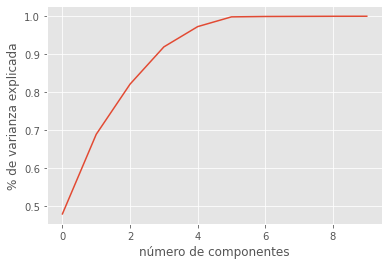

In [47]:
plot_explained_variance(components_count = 10, X = data_std)

## Prueba TSNE

In [36]:
from sklearn.manifold import TSNE

In [39]:
tsne = TSNE(random_state=42)

proj_tsne = tsne.fit_transform(data_std)

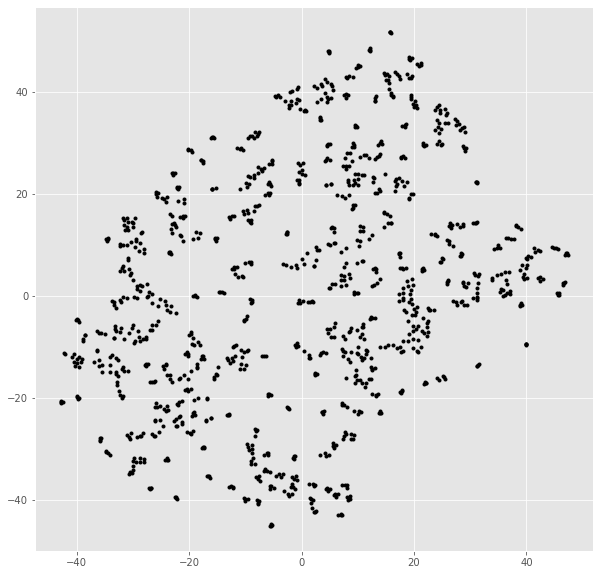

In [40]:
    fig, ax = plt.subplots(figsize=(10, 10))

    # get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
    ax = ax or plt.gca()
    
    coord_x = proj_tsne[:, 0]
    coord_y = proj_tsne[:, 1]
    ax.plot(coord_x, coord_y, '.k')    
    # símbolo . color k (black)